In [10]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [31]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egis_all.csv")
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")

X=data.iloc[:,0:10]
y=data.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
4852,261,50,141,127,70,2009,0.465939,0.166783,23,5.939224
4986,230,166,86,73,62,70,0.422905,0.242200,90,6.344265
2584,137,93,122,96,76,3,0.000942,0.131627,24,8.545860
4623,190,155,89,74,47,5097,0.399830,0.115447,228,4.566087
5099,215,111,120,89,67,491,0.501592,0.283630,63,7.054193
...,...,...,...,...,...,...,...,...,...,...
3772,272,55,147,118,73,1122,0.381918,0.139480,40,5.761959
5191,318,156,100,92,51,4722,0.000363,0.085849,47,7.449999
5226,287,105,90,78,52,2264,0.361341,0.146809,47,6.044147
5390,250,121,80,69,53,836,0.389967,0.148289,50,8.052185


In [32]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm="brute")
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [33]:
y_test_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
score=knn.score(X_train,y_train)
print(score)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

0.9671848013816926
Accuracy Test: 0.9232540291634689
Accuracy Train: 0.9671848013816926


Text(0.5, 1.0, 'Vegis TRAIN  DATA')

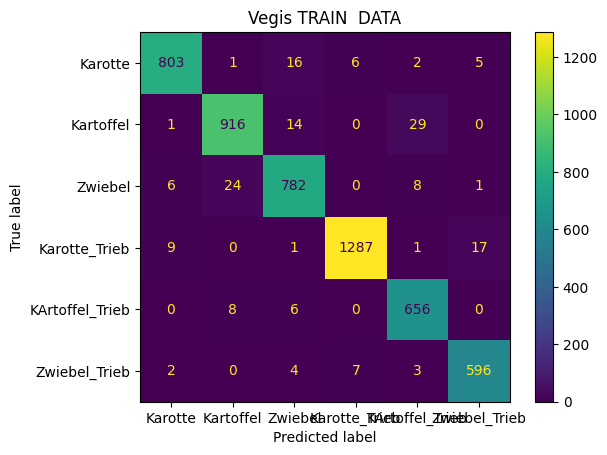

In [34]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

Text(0.5, 1.0, 'Vegis TEST DATA')

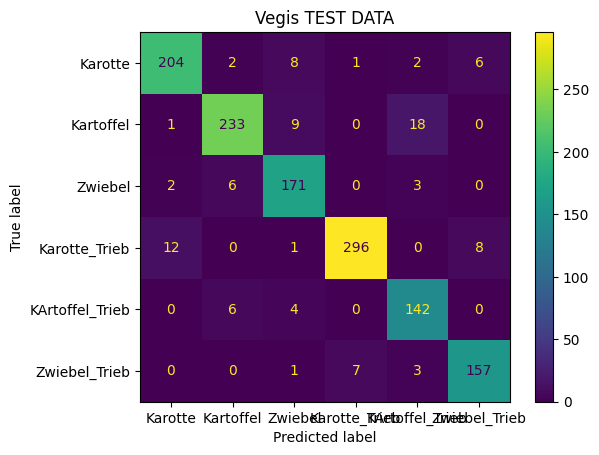

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

In [44]:
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_testData.csv")
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")

X_ILIAS=data.iloc[:,0:10]
y_ILIAS=data.iloc[:,10]



In [45]:
ILIAS_pred=knn.predict(X_ILIAS)
accuracy_ILIAS = accuracy_score(y_ILIAS, ILIAS_pred)
print(accuracy_ILIAS)


0.591715976331361
